## Pengantar 

Extract, Transform dan Load (ETL) merupakan kumpulan proses untuk "memindahkan" data dari satu tempat ke tempat lain.
Tempat yang dimaksud adalah dari sumber data (bisa berupa database aplikasi, file, logs, database dari 3rd party, dan lainnya) ke data warehouse.

Apa itu data warehouse?

Singkatnya, data warehouse merupakan database yang berisi data-data (tabel-tabel) yang sudah siap untuk dilakukan analisis oleh Data Analyst maupun Data Scientist.

Dataset ini terdiri dari 5000 baris data (5000 pendaftar) dengan format CSV (Comma-separated values) dan memiliki beberapa kolom diantaranya:

*   participant_id: ID dari peserta/partisipan hackathon. Kolom ini bersifat unique sehingga antar peserta pasti memiliki ID yang berbeda
*   first_name: nama depan peserta
*   last_name: nama belakang peserta
*   birth_date: tanggal lahir peserta
*   address: alamat tempat tinggal peserta
*   phone_number: nomor hp/telfon peserta
*   country: negara asal peserta
*   institute: institusi peserta saat ini, bisa berupa nama perusahaan maupun nama universitas
*   occupation: pekerjaan peserta saat ini
*   register_time: waktu peserta melakukan pendaftaran hackathon dalam second



 










In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np


#lakukan pembacaan dataset
df_participant = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqthon-participants.csv.') 

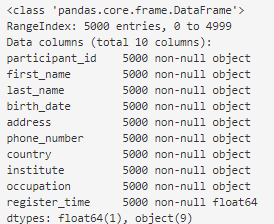

In [ ]:
from PIL import Image
img = Image.open('1.PNG')
img

## Transform

Transform merupakan proses melakukan transformasi data, atau perubahan terhadap data. Umumnya seperti:

*   Merubah nilai dari suatu kolom ke nilai baru,
*   Menciptakan kolom baru dengan memanfaatkan kolom lain,
*   Transpose baris menjadi kolom (atau sebaliknya),
*   Merubah format data ke bentuk yang lebih standar (contohnya kolom date, maupun datetime yang biasanya memiliki nilai yang tidak standar maupun nomor HP yang biasanya memiliki nilai yang tidak sesuai format standarnya), dan lainnya.  








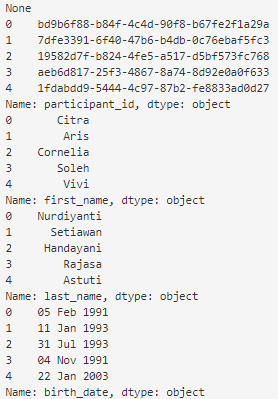

In [ ]:
from PIL import Image
img = Image.open('2.PNG')
img



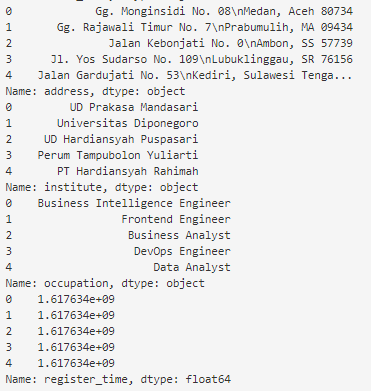

In [ ]:
img1 = Image.open('3.PNG')
img1

## Trasnform Kode Pos 

In [ ]:
df_participant['postal_code'] = df_participant['address'].str.extract(r'(\d+)$') #Masukkan regex Anda didalam fungsi extract

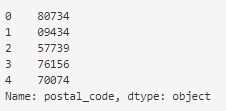

In [ ]:
from PIL import Image
img = Image.open('4.PNG')
img

## Transfrom City

In [ ]:
  #Masukkan regex Anda didalam fungsi extract
df_participant['city'] = df_participant['address'].str.extract(r'(?<=\n)(\w.+)(?=,)')

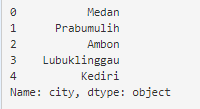

In [ ]:
from PIL import Image
img = Image.open('5.PNG')
img

## GITHUB

Pada kasus ini kita menggunakan profil github sebagai parameter nya. Tugas Anda yaitu membuat kolom baru bernama github_profile yang merupakan link profil github dari peserta.

Diketahui bahwa profil github mereka merupakan gabungan dari first_name dan last_name yang sudah di-lowercase. 

In [ ]:
df_participant['github_profile'] = 'https://github.com/' + 
df_participant['first_name'].str.lower() + 
df_participant['last_name'].str.lower()

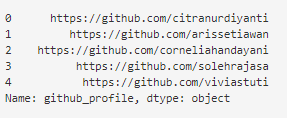

In [ ]:
from PIL import Image
img = Image.open('6.PNG')
img

## Nomor Handphone


*   Jika awalan nomor HP berupa angka 62 atau +62 yang merupakan kode telepon Indonesia, maka diterjemahkan ke 0.
*   Tidak ada tanda baca seperti kurung buka, kurung tutup, strip⟶ ()-
*   Tidak ada spasi pada nomor HP Nama kolom untuk menyimpan hasil cleansing pada nomor HP yaitu cleaned_phone_number

In [ ]:
#Masukkan regex anda pada parameter pertama dari fungsi replace
df_participant['cleaned_phone_number'] = df_participant['phone_number'].str.replace(r'^(\+62|62)', '0')
df_participant['cleaned_phone_number'] = df_participant['cleaned_phone_number'].str.replace(r'[()-]', '')
df_participant['cleaned_phone_number'] = df_participant['cleaned_phone_number'].str.replace(r'\s+', '')

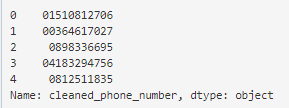

In [ ]:
from PIL import Image
img = Image.open('7.PNG')
img

## Nama Tim

Diketahui bahwa nama tim merupakan gabungan nilai dari kolom first_name, last_name, country dan institute.

Tugas Anda yakni buatlah kolom baru dengan nama team_name yang memuat informasi nama tim dari peserta.

In [ ]:
def func(col):
    abbrev_name = "%s%s"%(col['first_name'][0],col['last_name'][0]) #Singkatan dari Nama Depan dan Nama Belakang dengan mengambil huruf pertama
    country = col['country']
    abbrev_institute = '%s'%(''.join(list(map(lambda word: word[0], col['institute'].split())))) #Singkatan dari value di kolom institute
    return "%s-%s-%s"%(abbrev_name,country,abbrev_institute)

df_participant['team_name'] = df_participant.apply(func, axis=1)


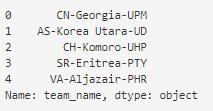

In [ ]:
from PIL import Image
img = Image.open('8.PNG')
img

## Email

Setelah dilihat kembali dari data peserta yang dimiliki, ternyata ada satu informasi yang penting namun belum tersedia, yaitu email.

In [ ]:
def func(col):
    first_name_lower = col['first_name'].lower()
    last_name_lower = col['last_name'].lower()
    institute = ''.join(list(map(lambda word: word[0], col['institute'].lower().split())))
    
    if 'Universitas' in col['institute']:
        if len(col['country'].split()) > 1:
            country = ''.join(list(map(lambda word: word[0], col['country'].lower().split())))
        else:
            country = col['country'][:3].lower()
        return "%s%s@%s.ac.%s"%(first_name_lower,last_name_lower,institute,country)
        
    return "%s%s@%s.com"%(first_name_lower,last_name_lower,institute)
    
df_participant['email'] = df_participant.apply(func, axis=1)

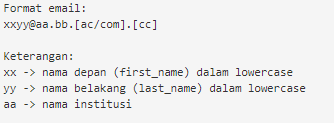

In [ ]:
from PIL import Image
img = Image.open('9.PNG')
img

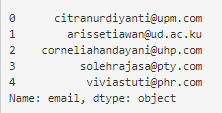

In [ ]:
from PIL import Image
img = Image.open('10.PNG')
img

## Tanggal Lahir

Meskipun begitu, ada suatu aturan dari MySQL terkait format tanggal yang bisa mereka terima yaitu YYYY-MM-DD dengan keterangan:
*  YYYY: 4 digit yang menandakan tahun
*   MM: 2 digit yang menandakan bulan
*   DD: 2 digit yang menandakan tanggal

Contohnya yaitu: 2021-04-07

In [ ]:
df_participant['birth_date'] = pd.to_datetime(df_participant['birth_date'], format='%d %b %Y')

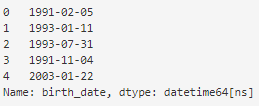

In [ ]:
from PIL import Image
img = Image.open('11.PNG')
img

##Tanggal Daftar Kompetisi

Selain punya aturan mengenai format DATE, MySQL juga memberi aturan pada data yang bertipe DATETIME yaitu YYYY-MM-DD HH:mm:ss dengan keterangan:

*   YYYY: 4 digit yang menandakan tahun
*   MM: 2 digit yang menandakan bulan
*   DD: 2 digit yang menandakan tanggal
*   HH: 2 digit yang menandakan jam
*   mm: 2 digit yang menandakan menit
*   ss: 2 digit yang menandakan detik

Contohnya yaitu: 2021-04-07 15:10:55

In [ ]:
df_participant['register_at'] = pd.to_datetime(df_participant['register_time'], unit='s')

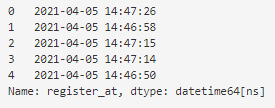

In [ ]:
from PIL import Image
img = Image.open('12.PNG')
img

## LOAD 

Pada bagian load ini, data yang sudah ditransformasi sedemikian rupa sehingga sesuai dengan kebutuhan tim Analyst dimasukkan kembali ke database yaitu Data Warehouse (DWH). Biasanya, dilakukan pendefinisian skema database terlebih dahulu seperti:

*   Nama kolom
*   Tipe kolom
*   Apakah primary key, unique key, index atau bukan
*   Panjang kolomnya

Karena umumnya Data Warehouse merupakan database yang terstruktur sehingga mereka memerlukan skema sebelum data nya dimasukkan.